In [1]:
import requests

r = requests.get('https://coins.llama.fi/chart/ethereum:0x40D16FC0246aD3160Ccc09B8D0D3A2cD28aE6C2f?start=1689433725&span=500&period=1d&searchWidth=1000')

In [6]:
data = r.json()
data

{'coins': {'ethereum:0x40D16FC0246aD3160Ccc09B8D0D3A2cD28aE6C2f': {'symbol': 'gho',
   'confidence': 0.99,
   'decimals': 18,
   'prices': [{'timestamp': 1689433725, 'price': 1.011},
    {'timestamp': 1689520188, 'price': 0.99254},
    {'timestamp': 1689606641, 'price': 0.988252},
    {'timestamp': 1689693148, 'price': 0.9849},
    {'timestamp': 1689779326, 'price': 0.992383},
    {'timestamp': 1689865652, 'price': 0.994667},
    {'timestamp': 1689952025, 'price': 0.985746},
    {'timestamp': 1690038426, 'price': 0.988062},
    {'timestamp': 1690124849, 'price': 0.984673},
    {'timestamp': 1690211253, 'price': 0.985327},
    {'timestamp': 1690297567, 'price': 0.981865},
    {'timestamp': 1690384032, 'price': 0.984791},
    {'timestamp': 1690470351, 'price': 0.984341},
    {'timestamp': 1690556824, 'price': 0.983538},
    {'timestamp': 1690643170, 'price': 0.983961},
    {'timestamp': 1690729573, 'price': 0.983967},
    {'timestamp': 1690816063, 'price': 0.985368},
    {'timestamp': 16

<Axes: xlabel='timestamp'>

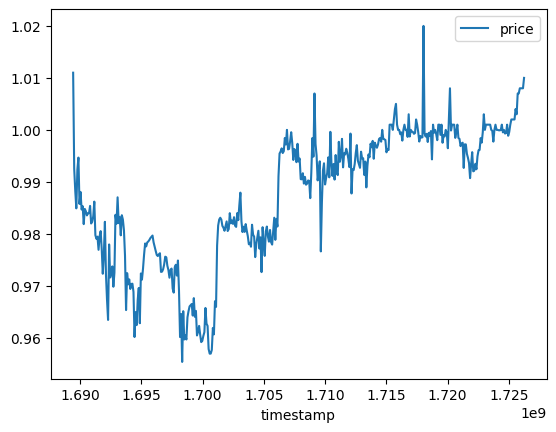

In [8]:
import pandas as pd
pd.DataFrame(data['coins']['ethereum:0x40D16FC0246aD3160Ccc09B8D0D3A2cD28aE6C2f']['prices']).plot(x='timestamp')

In [14]:
peg = data['coins']['ethereum:0x40D16FC0246aD3160Ccc09B8D0D3A2cD28aE6C2f']['prices']
peg = {str(d['timestamp']): d['price'] for d in peg}

In [16]:
import json
with open('peg_series.json', 'w') as fp:
    json.dump(peg, fp)

# DEBT CEILING

In [17]:
import json
with open('transfer_results.json', 'r') as fp:
    tx_data = json.load(fp)

In [18]:
tx_df = pd.DataFrame(tx_data)
tx_df['borrowCap'] = tx_df['borrowCap'].astype(float)

<Axes: xlabel='blockTimestamp'>

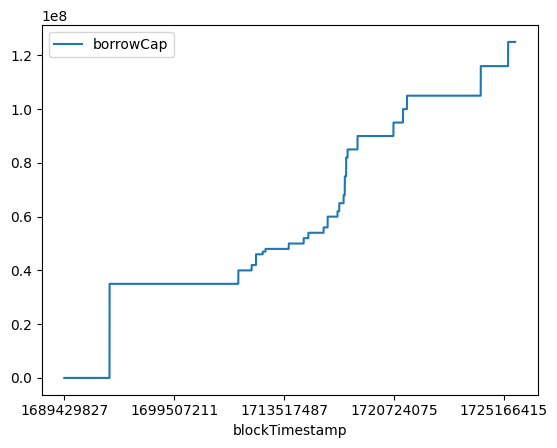

In [20]:
tx_df[['blockTimestamp', 'borrowCap']].plot(x='blockTimestamp')

In [24]:
tx_df[['blockTimestamp', 'borrowCap']].drop_duplicates('blockTimestamp').set_index('blockTimestamp').to_dict(orient='index')

{'1689429827': {'borrowCap': 0.0},
 '1689429851': {'borrowCap': 0.0},
 '1689429887': {'borrowCap': 0.0},
 '1689429935': {'borrowCap': 0.0},
 '1689429959': {'borrowCap': 0.0},
 '1689429995': {'borrowCap': 0.0},
 '1689430367': {'borrowCap': 0.0},
 '1689430379': {'borrowCap': 0.0},
 '1689430439': {'borrowCap': 0.0},
 '1689430523': {'borrowCap': 0.0},
 '1689430739': {'borrowCap': 0.0},
 '1689430955': {'borrowCap': 0.0},
 '1689430967': {'borrowCap': 0.0},
 '1689431003': {'borrowCap': 0.0},
 '1689431111': {'borrowCap': 0.0},
 '1689431123': {'borrowCap': 0.0},
 '1689431171': {'borrowCap': 0.0},
 '1689431195': {'borrowCap': 0.0},
 '1689431207': {'borrowCap': 0.0},
 '1689431219': {'borrowCap': 0.0},
 '1689431231': {'borrowCap': 0.0},
 '1689431243': {'borrowCap': 0.0},
 '1689431267': {'borrowCap': 0.0},
 '1689431327': {'borrowCap': 0.0},
 '1689431375': {'borrowCap': 0.0},
 '1689431423': {'borrowCap': 0.0},
 '1689431483': {'borrowCap': 0.0},
 '1689431543': {'borrowCap': 0.0},
 '1689431591': {'bor

In [25]:
ceiling = {k: v['borrowCap'] for k, v in tx_df[['blockTimestamp', 'borrowCap']].drop_duplicates('blockTimestamp').set_index('blockTimestamp').to_dict(orient='index').items()}

In [26]:
import json
with open('debt_ceilings.json', 'w') as fp:
    json.dump(ceiling, fp)